# Introduction to GeoPandas
## Reading a Shapefile
Spatial data can be read easily with geopandas using `gpd.from_file()` function.

In [1]:
# Import necessary module
import geopandas as gpd

In [2]:
# Set filepath
fp = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/DAMSELFISH_distributions.shp'

# Read file to geopandas format
data = gpd.read_file(fp)

In [3]:
# Let's see what datatype is our 'data' variable
type(data)

geopandas.geodataframe.GeoDataFrame

GeoDataFrame extends the functionalities of `pandas.DataFrame` in a way that it is possible to use and handle spatial data within Pandas. GeoDataFrame have some special features and functions that are useful in GIS.

In [4]:
# Take a look at our data
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


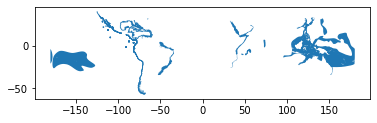

In [5]:
# If we just want to explore our data on a map, we can use `.plot()`
# function in geopandas that creates a simple map out of the data (uses matplotlib as backend)
%matplotlib inline
data.plot()

### Writing a Shapefile
Writing a new Shapefile is also something that is needed frequently.

In [6]:
# Create an output path for the data
out_file_path = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/DAMSELFISH_distributions_SELECTION.shp'

# Select the first 50 rows, this is a numpy/pandas syntax to 'slice'
# parts out of a dataframe/array, from position 0 until 50 (exclusive)
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out_file_path)

### Geometries in Geopandas
Geopandas takes advantage of Shapely's geometric objects. Geometries are typically stored in a column called _geometry_ (or _geom_).

In [7]:
# It is possible to use only specific columns by specifying the column name within 
# square brackets []
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

Since spatial data is stored as Shapely objects, it is possible to use all of the functionalities of Shapely module that we practiced earlier.

In [8]:
# Make a selection that contains only the first five rows
selection = data[0:5]

We can iterate over the selected rows using a specific `.iterrows()` function (geopandas also has this function) and print the area for each polygon. Since Geopandas is an **extension** for Pandas, all the functionalities of Pandas are available directly in Geopandas without the need to call it explicitly.

In [9]:
# iterate over the selected rows
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


We can call Shapely attributes easily in GeoDataFrame. Let's create a new column into our GeoDataFrame where we calculate and store the areas of individual polygons.

In [12]:
# geopandas seems to automatically recognize shapely attributes invocation
data['area'] = data.area

In [13]:
# let's see the first 2 rows of our 'area' column.
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

Let's check what is the min and the max of those areas using familiar functions in Pandas.

In [15]:
# Maximum area
max_area = data['area'].max()

# Mean area
mean_area = data['area'].mean()

# Note that area here is in "decimal degrees" unit
print("Max area: {:.2f}\nMean area: {:.2f}".format(round(max_area, 2), round(mean_area, 2)))

Max area: 1493.20
Mean area: 19.96


### Creating geometries into a GeoDataFrame
It is possible to create a Shapefile from a scratch by passing Shapely's geometric objects into the GeoDataFrame. 

In [16]:
# import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [18]:
# Let's see what is inside
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [19]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [21]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [22]:
# Insert the polygon into 'geometry' column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
newdata

,geometry
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16..."


In [23]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Helsinki Senate Square'

# Let's check the data
newdata

,geometry,Location
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16...",Helsinki Senate Square


Before exporting the data it is useful to **determine the coordinate reference system (projection)** for the GeoDataFrame.

In [24]:
print(newdata.crs)

None


Let's add a crs for our GeoDataFrame. A Python module called **fiona** has a nice function called `from_epsg()` for passing coordinate system for the GeoDataFrame. We will use that and determine the projection to WGS84 (epsg code: 4326).

In [25]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [26]:
# Determine the output path for the Shapefile
out_file = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/Senaatintori.shp'

# Write the data into that Shapefile
newdata.to_file(out_file)

By now we have successfully created a Shapefile from the scratch using only Python. Similar approach can be used for example to read coordinates from a text file (e.g. points) and create Shapefiles from those automatically.

### Practical Example: Save Multiple Shapefiles
With the `Group By` function we can group data based on values on selected columns.

In [28]:
# Re-load the data again
# Set filepath
fp = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/DAMSELFISH_distributions.shp'

# Read file to geopandas format
data = gpd.read_file(fp)
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


In [29]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Let's see what we got
grouped

The `DataFrameGroupBy` object is similar to list of keys and values (in a dictionary) that we can iterate over.

In [30]:
# Iterate over the group object
for key, values in grouped:
    individual_fish = values
    print(key)

Abudefduf concolor
Abudefduf declivifrons
Abudefduf troschelii
Amphiprion sandaracinos
Azurina eupalama
Azurina hirundo
Chromis alpha
Chromis alta
Chromis atrilobata
Chromis crusma
Chromis cyanea
Chromis flavicauda
Chromis intercrusma
Chromis limbaughi
Chromis pembae
Chromis punctipinnis
Chrysiptera flavipinnis
Hypsypops rubicundus
Microspathodon bairdii
Microspathodon dorsalis
Nexilosus latifrons
Stegastes acapulcoensis
Stegastes arcifrons
Stegastes baldwini
Stegastes beebei
Stegastes flavilatus
Stegastes leucorus
Stegastes rectifraenum
Stegastes redemptus
Teixeirichthys jordani


In [31]:
# Let's see what is the LAST item that we iterated
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.6300326400001 33.04248618400004,..."
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219482400007 29.97488975500005,..."
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.9052090560001 34.02498196400006,..."
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((56.32233070000007 -3.707270205999976...
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((40.64476131800006 -10.85502363999996...
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((48.11258402900006 -9.335103113999935...
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75403543100003 -9.21679305899994,..."


In [33]:
# Let's check again the datatype of the grouped object
# and what does the `key` variable contain
print(type(individual_fish))
print(key)

<class 'geopandas.geodataframe.GeoDataFrame'>
Teixeirichthys jordani


Each set of data are now grouped into separate GeoDataFrames that we can export into Shapefiles using the variable `key` for creating the output filepath names.

In [37]:
import os

# Determine outputpath
out_folder = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2'

# Create a new folder called 'Results' (if does not exist)
# to that folder using os.makedirs() function
result_folder = os.path.join(out_folder, 'Results')
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

# Iterate over groupby
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    updated_key = key.replace(" ", "_")
    out_name = updated_key + ".shp"
    
    # Print some information for the user
    print("Processing: {}".format(out_name))
    
    # Create an output path, we join two folder names together 
    # without using slash or backslash
    outpath = os.path.join(result_folder, out_name)
    
    # Export the data
    values.to_file(outpath)

Processing: Abudefduf_concolor.shp
Processing: Abudefduf_declivifrons.shp
Processing: Abudefduf_troschelii.shp
Processing: Amphiprion_sandaracinos.shp
Processing: Azurina_eupalama.shp
Processing: Azurina_hirundo.shp
Processing: Chromis_alpha.shp
Processing: Chromis_alta.shp
Processing: Chromis_atrilobata.shp
Processing: Chromis_crusma.shp
Processing: Chromis_cyanea.shp
Processing: Chromis_flavicauda.shp
Processing: Chromis_intercrusma.shp
Processing: Chromis_limbaughi.shp
Processing: Chromis_pembae.shp
Processing: Chromis_punctipinnis.shp
Processing: Chrysiptera_flavipinnis.shp
Processing: Hypsypops_rubicundus.shp
Processing: Microspathodon_bairdii.shp
Processing: Microspathodon_dorsalis.shp
Processing: Nexilosus_latifrons.shp
Processing: Stegastes_acapulcoensis.shp
Processing: Stegastes_arcifrons.shp
Processing: Stegastes_baldwini.shp
Processing: Stegastes_beebei.shp
Processing: Stegastes_flavilatus.shp
Processing: Stegastes_leucorus.shp
Processing: Stegastes_rectifraenum.shp
Processi

## Map Projections
Coordinate Reference Systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space.  
  
A CRS tells Python how those coordinates related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

### Coordinate Reference Systems (CRS)
Also referred to as Spatial Reference Systems (SRS), include two common types:
* Geographic Coordinate Systems
* Projected Coordinate Systems  
  
WGS84 is an example of a Geographic Coordinate System (lat, lon coordinates). 

#### Geographic Coordinate Systems (GCS)
A GCS uses an ellipsoidal surface to define locations on the Earth. There are three parts to a geographic coordinate system:
* A datum - an ellipsoidal (spheroid) model of the Earth to use. Common datums include WGS84 (used in GPS)
* A prime meridian
* Angular unit of measure  
  
Both latitude and longitude are typically represented in two ways:
* Degrees, Minutes, Seconds (DMS)
* Decimal Degrees (DD) used by computers and stored as float data type

#### Projected Coordinate System (PCS)
A PCS define a flat 2D Cartesian surface. Unlike a GCS, a PCS has constant lengths, angles, and areas across the two dimensions. A PCS is always based on a GCS that references a specific datum.  
  
PCS consists of:
* GCS
* Projection Method
* Projection Parameters (standard points and lines, Latitude of Origin, Longitude of Origin, False Easting, False Northing, etc)
* Linear units (meters, kilometers, miles, etc)

### Changing CRS
A GeoDataFrame that is read from a Shapefile should contain information about the coordinate system in which the data is projected.

In [38]:
# import modules
import geopandas as gpd

# Filepath to the Europe borders Shapefile
fp = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/Europe_borders.shp'

# Read data
data = gpd.read_file(fp)

In [39]:
# We can see the CRS from `.crs` attribute
data.crs

{'init': 'epsg:4326'}

The EPSG number ("European Petroleum Survey Group") is a code that tells about the coordinate system of the dataset. EPSG 4326 belongs to the WGS84 coordinate system (i.e coordinates are in decimal degrees (lat, lon)).

In [40]:
# Let's also check the values in our `geometry` column.
data['geometry'].head()

0    (POLYGON ((19.50115199999999 40.96229600000001...
1    POLYGON ((1.439921999999996 42.60649100000001,...
2    POLYGON ((16 48.77775199999999, 16 48.78252000...
3    POLYGON ((5 49.79374300000001, 4.9972390000000...
4    POLYGON ((19.22947300000001 43.534584, 19.2292...
Name: geometry, dtype: object

Let's convert those geometries into Lambert Azimuthal Equal Area projection (EPSG: 3035). Changing the CRS is done in Geopandas with `.to_crs()`. As an input for the function, we should define the column containing the geometries, i.e. `geometry` and a `epgs` value of the CRS that we want to use.

In [41]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=3035)

In [42]:
# Let's see how the coordinates look now.
data_proj['geometry'].head()

0    (POLYGON ((5122010.374968257 2035145.185739248...
1    POLYGON ((3618045.757868871 2206753.800991116,...
2    POLYGON ((4761568.78212208 2869552.348527733, ...
3    POLYGON ((3961258.261978631 2976824.238370664,...
4    POLYGON ((5066801.274064774 2315488.07299847, ...
Name: geometry, dtype: object

Let's compare the datasets by making maps out of them.

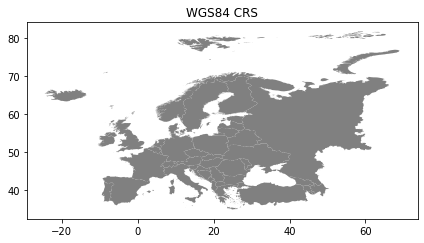

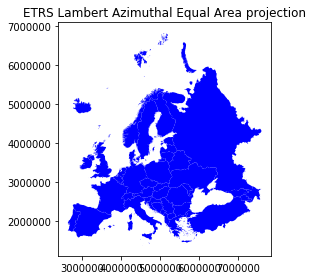

In [43]:
import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(facecolor='gray')

# Add title
plt.title("WGS84 CRS")

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue')

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection")

# Remove empty white space around the plot
plt.tight_layout()

Using different projection methods resulting in different visual representation. Finally, let's save our projected layer into a Shapefile so that we can use it later.

In [44]:
# Output file path
out_fp = '/Users/Gandhi/Documents/Study/Python/GIS/geospatial_analysis_UT/data/L2/Europe_borders_epsg3035.shp'

# Save to disk
data_proj.to_file(out_fp)

### Calculating Distances
We will calculate the distance between Tartu and other European countries (measured from the centroids) using a metric projection (World Azimuthal Equidistant - where distances are represented correctly from the center longitude and latitude) that gives us the distance in meters.

In [45]:
# first import necessary packages
from shapely.geometry import Point
from fiona.crs import from_epsg

In [46]:
# let's specify our target location to be Tartu
tartu_lon = 26.7290
tartu_lat = 58.3780

In [47]:
# let's specify the +lat_0 and +lon_0 parameters in Proj4 string
# to reproject our data into World Azimuthal Equidistant
proj4_txt = '+proj=aeqd +lat_0=58.3780 +lon_0=26.7290 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [48]:
# Create a new copy of our GDF
data_d = data.to_crs(proj4_txt)

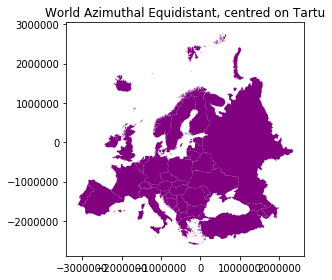

In [49]:
# let's take a look at our data and create a map
data_d.plot(facecolor='purple')
plt.title("World Azimuthal Equidistant, centred on Tartu")
plt.tight_layout()

Let's continue our analysis by creating a Point object from Tartu and insert it into a GeoPandas GeoSeries. We also specify that the CRS of the GeoSeries is WGS84.

In [51]:
tartu = gpd.GeoSeries([Point(tartu_lon, tartu_lat)], crs=from_epsg(4326))

In [52]:
# convert this point to the same CRS as our Europe data is
tartu = tartu.to_crs(proj4_txt)
print(tartu)

0    POINT (0 0)
dtype: object


Next we need to calculate the centroids for all the Polygons of the European countries.

In [53]:
data_d['country_centroid'] = data_d.centroid
data_d.head(2)

,NAME,ORGN_NAME,geometry,country_centroid
0,Albania,Shqipëria,(POLYGON ((-616930.8489551456 -1905901.3780810...,POINT (-566125.4395884104 -1891201.933676238)
1,Andorra,Andorra,POLYGON ((-2059909.805611565 -1383253.28615459...,POINT (-2051296.405115049 -1393144.786901844)


Next we calculate the distances between the centroids and Tartu. In (Geo)Pandas the `apply()` function takes advantage of numpy when looping, and is much faster which can give a lot of speed benefit when we have many rows to iterate over. 

In [54]:
# calculateDistance() is a function to calculate the distance
# between Tartu and centroids of European countries
def calculateDistance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between a single Shapely Point geometry and a GeoDataFrame with
    Point geometries.
    Parameters
    ----------
    dest_geom : shapely.Point
        A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
        A name of the column that has the Shapely Point objects from where the distances
        will be calculated
    target_col : str
        A name of the target column where the result will be stored.
    """
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)
    # Transform into kilometers
    dist_km = dist/1000
    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

We need to get the Shapely point geometry from the re-projected Tartu center point.

In [55]:
tartu_geom = tartu.get(0)
print(tartu_geom)

POINT (0 0)


Now we 'apply' our function `calculateDistance()`. Remember to specify that the `axis=1`. This specifies that the calculations should be done row by row/row-wise (instead of column by column / column-wise).

In [56]:
data_d = data_d.apply(calculateDistance, dest_geom=tartu_geom, src_col='country_centroid',
                     target_col='dist_to_tartu', axis=1)

data_d.head(20)

,NAME,ORGN_NAME,geometry,country_centroid,dist_to_tartu
0,Albania,Shqipëria,(POLYGON ((-616930.8489551456 -1905901.3780810...,POINT (-566125.4395884104 -1891201.933676238),1974.118225
1,Andorra,Andorra,POLYGON ((-2059909.805611565 -1383253.28615459...,POINT (-2051296.405115049 -1393144.786901844),2479.651052
2,Austria,Österreich,"POLYGON ((-789218.35432305 -1007540.792328262,...",POINT (-948755.522597741 -1114052.807939216),1463.301302
3,Belgium,België / Belgique,POLYGON ((-1545487.014573338 -710685.915264457...,POINT (-1539443.737243496 -612758.1305822198),1656.912655
4,Bosnia Herzegovina,Bosna i Hercegovina,POLYGON ((-611931.2361515206 -1618946.30735332...,POINT (-720901.3353535737 -1534770.530725551),1695.647168
5,Croatia,Hrvatska,(POLYGON ((-993254.0654611164 -1456331.3493832...,POINT (-817203.7504680654 -1426447.263159431),1643.950658
6,Czech Republic,Cesko,POLYGON ((-836233.0813217848 -763077.619956894...,POINT (-820305.7556056002 -893458.8154076249),1212.918046
7,Denmark,Danmark,(POLYGON ((-937254.7384249611 -280819.97826449...,POINT (-1031556.20453392 -139241.4327812183),1040.911322
8,Estonia,Eesti,(POLYGON ((-162360.8304676997 -27988.570148211...,POINT (-68261.66737902735 33616.46986523151),76.090225
9,Finland,Suomi,(POLYGON ((-257841.948197337 215108.6412192509...,POINT (-27931.56046824135 653427.4508199027),654.024163


In [57]:
# Let's check what is the longest and mean distance to Tartu
# from the centroids of other European countries
max_dist = data_d['dist_to_tartu'].max()
mean_dist = data_d['dist_to_tartu'].mean()

print("Maximum distance to Tartu is {:.2f} km, and the mean distance is {:.2f} km".format(max_dist, mean_dist))

Maximum distance to Tartu is 3403.98 km, and the mean distance is 1688.60 km
